# **1) Preprocessing Time Series Data**

**Explained in a previous session :)**

# **2) Time Series Analysis & Decomposition Techniques**

##**a)Autoencorrelation**

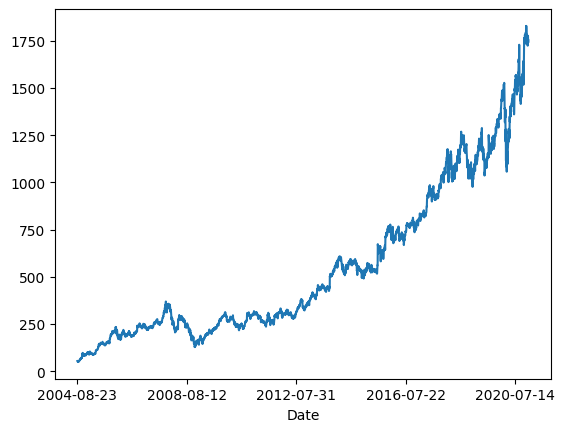

In [ ]:
#First Dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.stattools import durbin_watson
from statsmodels.regression.linear_model import OLS
from statsmodels.graphics.tsaplots import plot_acf

goog_stock_Data = pd.read_csv('GOOG.csv', header=0, index_col=0)
goog_stock_Data['Adj Close'].plot()
plt.show()

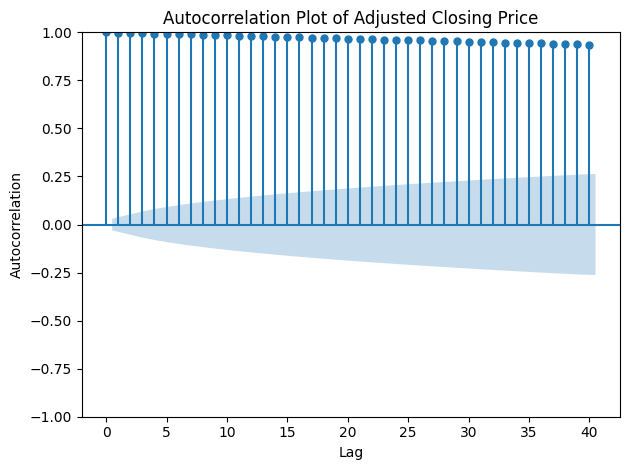

In [ ]:
plot_acf(goog_stock_Data['Adj Close'], alpha=0.05, lags=40)
plt.title("Autocorrelation Plot of Adjusted Closing Price")
plt.xlabel("Lag")
plt.ylabel("Autocorrelation")
plt.tight_layout()
plt.show()


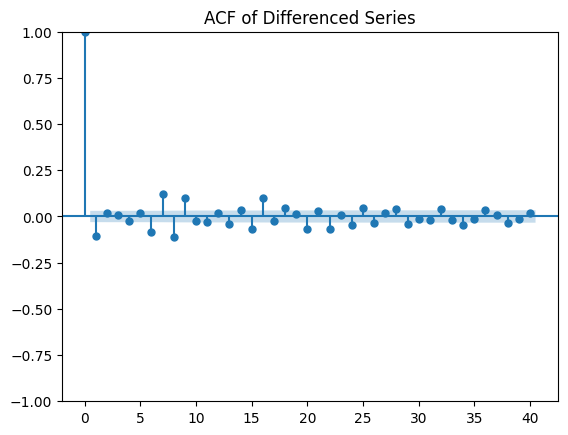

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
diff_series = goog_stock_Data['Adj Close'].diff().dropna()
plot_acf(diff_series, alpha=0.05, lags=40)
plt.title("ACF of Differenced Series")
plt.show()


##**b)Partial Autocorrelation**##

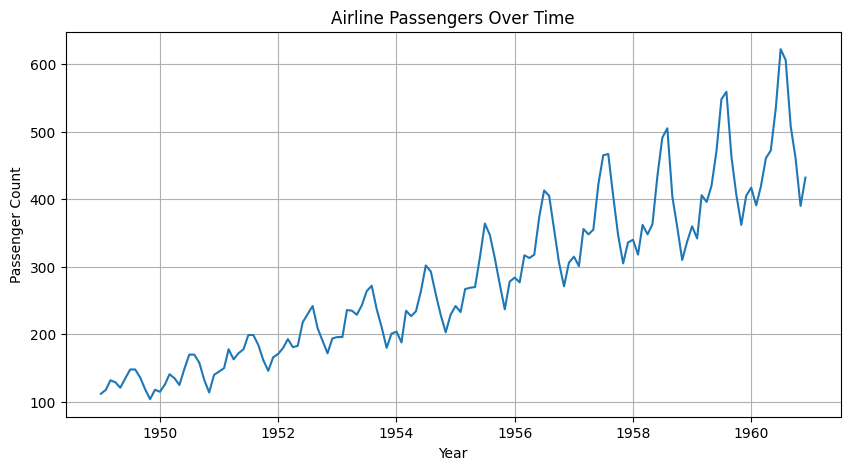

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.datasets import get_rdataset

# Load the 'AirPassengers' dataset from R's datasets package
data = get_rdataset('AirPassengers').data

# Convert fractional years to datetime
# 'time' is like 1949.000, 1949.083, etc. -> year + month fraction
years = data['time'].astype(int)
months = ((data['time'] - years) * 12 + 1).round().astype(int)

# Create a proper datetime column
data['date'] = pd.to_datetime(dict(year=years, month=months, day=1))
data.set_index('date', inplace=True)

# Plot
plt.figure(figsize=(10, 5))
plt.plot(data['value'])
plt.title('Airline Passengers Over Time')
plt.xlabel('Year')
plt.ylabel('Passenger Count')
plt.grid(True)
plt.show()


✅ **Calculating and Plotting PACF**

> PACF Computation: Compute the Partial Autocorrelation Function (PACF) values for the 'AirPassengers' dataset using pacf from statsmodels. Define the number of lags as 20.

> PACF Plotting: Create a bar plot representing the PACF values against lags to visualize partial correlations. Set title, labels for axes, and display the PACF plot.





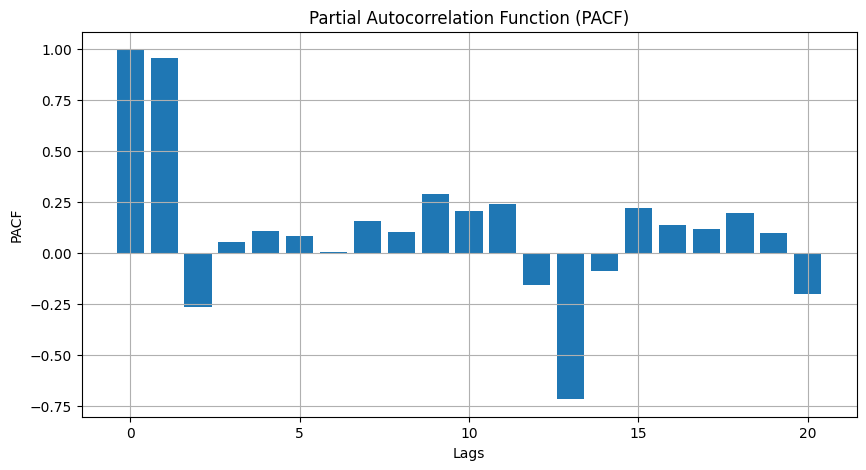

In [ ]:
from statsmodels.tsa.stattools import pacf
# Calculate PACF using statsmodels pacf function
pacf_values = pacf(data['value'], nlags=20)

# Plot PACF
plt.figure(figsize=(10, 5))
plt.bar(range(len(pacf_values)), pacf_values)
plt.title('Partial Autocorrelation Function (PACF)')
plt.xlabel('Lags')
plt.ylabel('PACF')
plt.grid(True)
plt.show()

##**c)Trend Analysis**##

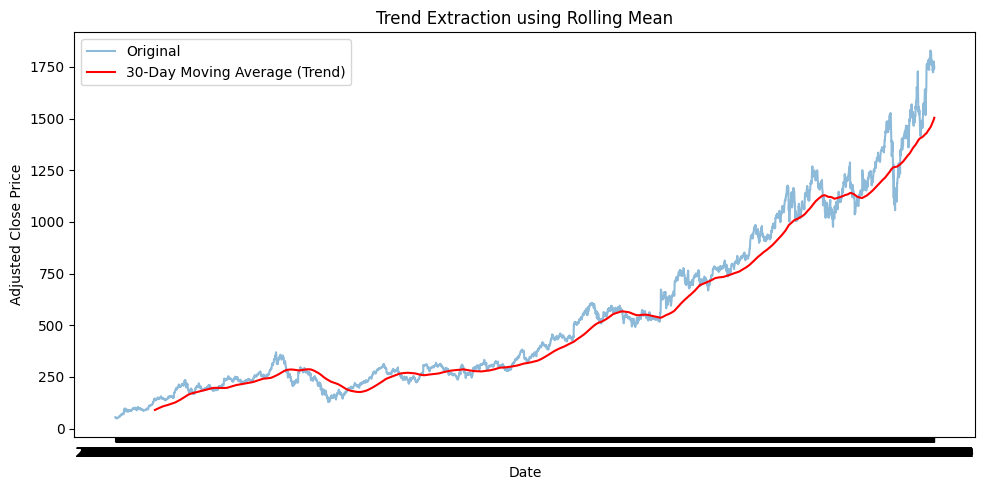

In [ ]:
import matplotlib.pyplot as plt

# Calculate 30-day moving average
goog_stock_Data['Trend'] = goog_stock_Data['Adj Close'].rolling(window=200).mean()

# Plot original vs. trend
plt.figure(figsize=(10, 5))
plt.plot(goog_stock_Data['Adj Close'], label='Original', alpha=0.5)
plt.plot(goog_stock_Data['Trend'], label='30-Day Moving Average (Trend)', color='red')
plt.title("Trend Extraction using Rolling Mean")
plt.xlabel("Date")
plt.ylabel("Adjusted Close Price")
plt.legend()
plt.tight_layout()
plt.show()

##**d)Seasonal and Trend decomposition using Loess (STL)**##

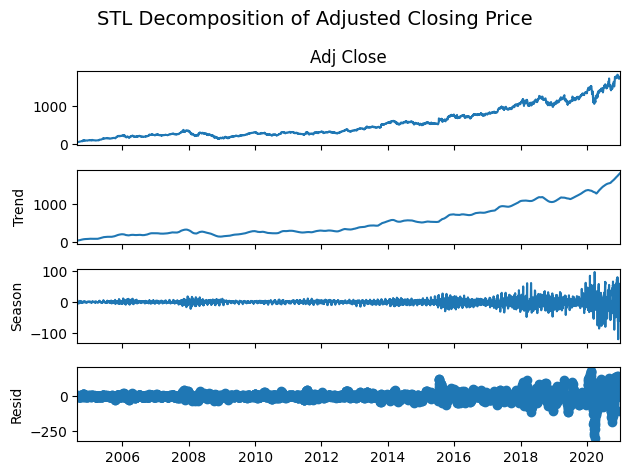

In [ ]:
from statsmodels.tsa.seasonal import STL
import matplotlib.pyplot as plt

# STL works best with a datetime index
goog_stock_Data.index = pd.to_datetime(goog_stock_Data.index)

# STL assumes a fixed seasonal period — here we try 365 (daily data with yearly pattern)
# If you're unsure about seasonality, you can set period=30 or 12 for testing purposes
stl = STL(goog_stock_Data['Adj Close'], period=30, robust=True)
result = stl.fit()

# Plot the decomposition
result.plot()
plt.suptitle("STL Decomposition of Adjusted Closing Price", fontsize=14)
plt.tight_layout()
plt.show()


##**e)Seasonality Analysis**##

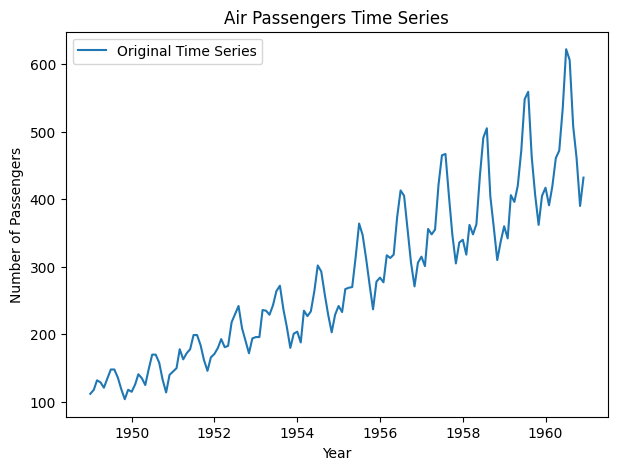

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

data = pd.read_csv('AirPassengers.csv')
data['Month'] = pd.to_datetime(data['Month'], format='%Y-%m')
data.set_index('Month', inplace=True)

# Plot the original time series data
plt.figure(figsize=(7, 5))
plt.plot(data, label='Original Time Series')
plt.title('Air Passengers Time Series')
plt.xlabel('Year')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()

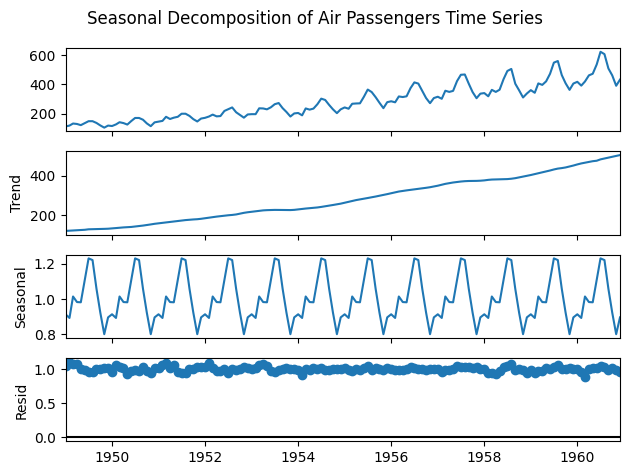

In [ ]:
# Decompose the time series into trend, seasonal and residual components
result = seasonal_decompose(
    data, model='multiplicative', extrapolate_trend='freq')
result.plot()
plt.suptitle('Seasonal Decomposition of Air Passengers Time Series')
plt.tight_layout()
plt.show()

# **3) Time Series Forecasting**

to be added

# **4) Evaluating Time Series Forecasts**

**Explained in a previous session :)**